In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab3.ipynb")

# Lab 3 - Line & Area charts

The questions in each lab will be autograded, and all the autograded tests will give you immediate feedback directly in the notebook. This way you can quickly iterate and learn how to create your visualization during the lab time. After you upload your lab on gradescope, the same tests will run again and you will be able to see your score right away.

## Submission instructions

<div class="alert alert-info" style="color:black">
<ul>
  <li>Download this lab from the Jupyter Book web page by clicking the download symbol at the top right of the page and selecting the <code>.ipynb</code> format.</li>
  <li>To submit this lab, answer all the questions and then upload the completed lab to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells (click the ▶▶ button).</li>
    </ul>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  </li>
</ul>
</div>

## Diet composition around the world

In this lab we will explore the consumption of different food commodities around the world.
The data used for this lab is from the excellent site "Our world in data"
and [their articles on diet consumption](https://ourworldindata.org/diet-compositions).
We will need to do some preprocessing of the data we are going to use,
so you can just follow along in the next two cells.
As you can see when we load in the data,
it is a bit messy with one column for each fruit,
and with column names that are hard to read.

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/fruit-consumption-by-fruit-type.csv'
pd.read_csv(url, parse_dates=['Year'])

,Entity,Code,Year,Food Supply - Crops Primary Equivalent - Bananas - 2615 - Food supply quantity (kg/capita/yr) - 645 - kg,Food Supply - Crops Primary Equivalent - Dates - 2619 - Food supply quantity (kg/capita/yr) - 645 - kg,"Food Supply - Crops Primary Equivalent - Citrus, Other - 2614 - Food supply quantity (kg/capita/yr) - 645 - kg","Food Supply - Crops Primary Equivalent - Oranges, Mandarines - 2611 - Food supply quantity (kg/capita/yr) - 645 - kg",Food Supply - Crops Primary Equivalent - Apples and products - 2617 - Food supply quantity (kg/capita/yr) - 645 - kg,"Food Supply - Crops Primary Equivalent - Lemons, Limes and products - 2612 - Food supply quantity (kg/capita/yr) - 645 - kg",Food Supply - Crops Primary Equivalent - Grapes and products (excl wine) - 2620 - Food supply quantity (kg/capita/yr) - 645 - kg,Food Supply - Crops Primary Equivalent - Grapefruit and products - 2613 - Food supply quantity (kg/capita/yr) - 645 - kg,Food Supply - Crops Primary Equivalent - Pineapples and products - 2618 - Food supply quantity (kg/capita/yr) - 645 - kg,Food Supply - Crops Primary Equivalent - Plantains - 2616 - Food supply quantity (kg/capita/yr) - 645 - kg,"Food Supply - Crops Primary Equivalent - Fruits, Other - 2625 - Food supply quantity (kg/capita/yr) - 645 - kg"
0,Afghanistan,AFG,1961-01-01,0.00,0.0,0.52,1.07,1.60,NaN,14.05,NaN,0.00,NaN,23.88
1,Afghanistan,AFG,1962-01-01,0.00,0.0,0.51,1.05,1.57,NaN,11.70,NaN,0.00,NaN,23.17
2,Afghanistan,AFG,1963-01-01,0.00,0.0,0.50,1.03,1.54,NaN,13.07,NaN,0.00,NaN,22.12
3,Afghanistan,AFG,1964-01-01,0.00,0.0,0.60,1.27,1.83,NaN,18.58,NaN,0.00,NaN,25.64
4,Afghanistan,AFG,1965-01-01,0.00,0.0,0.66,1.98,1.98,NaN,17.31,NaN,0.00,NaN,26.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10335,Zimbabwe,ZWE,2009-01-01,7.11,0.0,0.06,3.61,1.02,0.99,0.06,0.69,0.04,NaN,0.68
10336,Zimbabwe,ZWE,2010-01-01,7.51,0.0,0.06,4.50,1.53,1.01,0.11,0.51,0.09,NaN,0.80
10337,Zimbabwe,ZWE,2011-01-01,6.26,0.0,0.00,6.89,1.70,0.95,0.12,0.44,0.05,NaN,0.78
10338,Zimbabwe,ZWE,2012-01-01,6.52,0.0,0.04,6.96,1.76,0.99,0.20,0.49,0.07,NaN,0.86


To get the data into a "tidy" (or "long") format,
which is the ideal way to work with data in many packages including Altair,
we need to first reshape the data with the `melt` function
and rename the columns.
You don't need to understand this code in detail,
but it is here for you if you want to study it.

In [3]:
fruits = pd.read_csv(
    url,
    parse_dates=['Year']
).drop(
    # Removing one column we are not interesting in here to simplify the data
    columns='Food Supply - Crops Primary Equivalent - Citrus, Other - 2614 - Food supply quantity (kg/capita/yr) - 645 - kg'
).rename(
    # Extract the relevant part of each column name
    columns=lambda x: x.split(' - ')[2] if '-' in x else x,
).melt(
    id_vars=['Entity', 'Code', 'Year'],
    var_name='Fruit',
    value_name='KgPerCapita'
).rename(
    columns={'Entity': 'Country'}
)

fruits

,Country,Code,Year,Fruit,KgPerCapita
0,Afghanistan,AFG,1961-01-01,Bananas,0.00
1,Afghanistan,AFG,1962-01-01,Bananas,0.00
2,Afghanistan,AFG,1963-01-01,Bananas,0.00
3,Afghanistan,AFG,1964-01-01,Bananas,0.00
4,Afghanistan,AFG,1965-01-01,Bananas,0.00
...,...,...,...,...,...
103395,Zimbabwe,ZWE,2009-01-01,"Fruits, Other",0.68
103396,Zimbabwe,ZWE,2010-01-01,"Fruits, Other",0.80
103397,Zimbabwe,ZWE,2011-01-01,"Fruits, Other",0.78
103398,Zimbabwe,ZWE,2012-01-01,"Fruits, Other",0.86


That looks better!
Now we can proceed with the first question of the lab.

In [4]:
# Run this cell to ensure that altair plots show up on gradescope
# We will talk more about what these lines do later in the course
import altair as alt

# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')
# Include an image for each plot since Gradescope only supports displaying plots as images
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

### Question 1

<div class="alert alert-info" style="color:black">

<ol type="1">
<li>Create a line plot for the amount of fruit consumed per person in total around the entire world over time.
Plot the consumption on the y-axis, the year on the x-axis, and color the lines by the fruit type.</li>
<li>Create a stacked area plot of the same data and comment on the benefits of using an area or line plot in this case.</li>
</ol>
</div>

_Points:_ 4

_Type your answer here, replacing this text._

In [5]:
fruits.head()

,Country,Code,Year,Fruit,KgPerCapita
0,Afghanistan,AFG,1961-01-01,Bananas,0.0
1,Afghanistan,AFG,1962-01-01,Bananas,0.0
2,Afghanistan,AFG,1963-01-01,Bananas,0.0
3,Afghanistan,AFG,1964-01-01,Bananas,0.0
4,Afghanistan,AFG,1965-01-01,Bananas,0.0


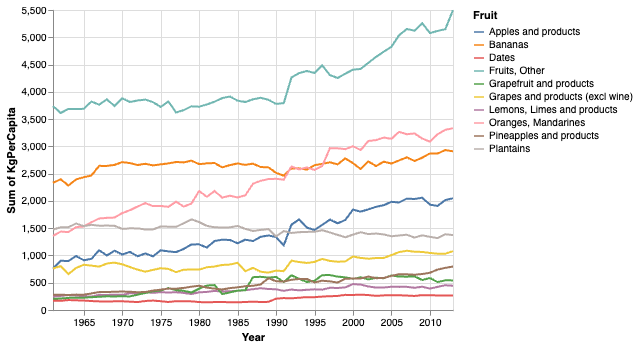

In [6]:
kg_time_line = alt.Chart(fruits).mark_line().encode(
    alt.X('Year'),
    alt.Y('sum(KgPerCapita):Q'),
    alt.Color('Fruit')
)

# Show the chart
kg_time_line

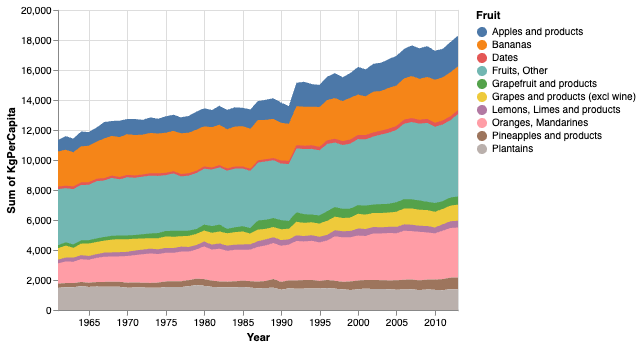

In [7]:
kg_time_area = alt.Chart(fruits).mark_area().encode(
    alt.X('Year'),
    alt.Y('sum(KgPerCapita):Q'),
    alt.Color('Fruit')
)


# Show the chart
kg_time_area

In [8]:
grader.check("q1")

q1 results: All test cases passed!
q1 - 1 message: All your variables have the expected name and type

### Question 2

<div class="alert alert-info" style="color:black">

Let's look closer at some of the biggest countries in the Americas and compare their fruit consumption.

<ol type="1">
<li>Filter the dataframe to only include observations from Canada, United States, Mexico, and Brazil.</li>
<li>Create a line plot of the total fruit consumption in each of these countries over time. There should be four lines in the same chart, one for each country.</li>
<li>Another way to contrast the consumption between the countries is to create a heatmap where the color is the total consumption and there is one row for each country. Create a heatmap and encode the 'Year' attribute as Ordinal.</li>
<li>In addition to the trend in overall fruit consumption, it would be interesting to find out if there are differences in the type of fruits produced within each country. Create a faceted line plot, where the color represents the type of fruit and there is one facet for each country. What differences in the type of fruit produced can you see?</li>
</ol>
</div>

_Points:_ 6

_Type your answer here, replacing this text._

In [9]:
# 1. Filter the dataframe to only include observations from Canada, United States, Mexico, and Brazil.
fruits_americas = fruits[(fruits['Country']=='Canada') | (fruits['Country']=='United States') | (fruits['Country']=='Mexico') | (fruits['Country']=='Brazil')]

# Confirm that you have filtered the correct countries
fruits_americas['Country'].unique()

array(['Brazil', 'Canada', 'Mexico', 'United States'], dtype=object)

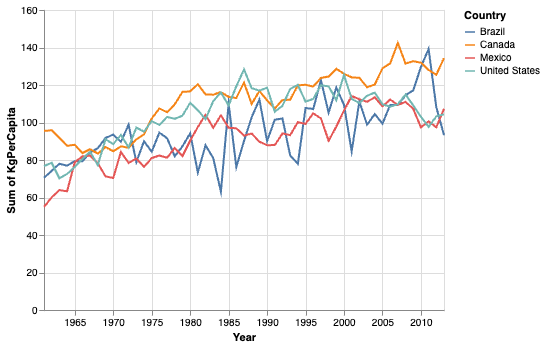

In [10]:
# 2. Create a line plot of the total fruit consumption in each of these countries over time.
lines_countries_consumption = alt.Chart(fruits_americas).mark_line().encode(
    alt.X('Year:T'),
    alt.Y('sum(KgPerCapita):Q'),
    alt.Color('Country')
)

# Show the chart
lines_countries_consumption

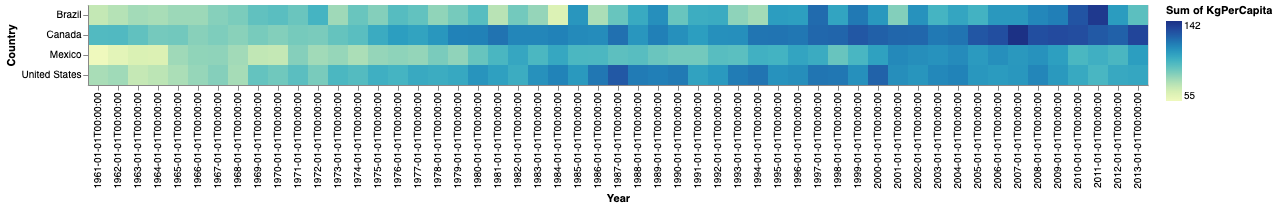

In [11]:
# 3. Another way to contrast the consumption between the countries is to create a heatmap where the color is the total consumption and there is one row for each country. Create one and reflect over what you think are the pros and cons of the heatmap versus the line plot.
heatmap_countries_consumption = alt.Chart(fruits_americas).mark_rect().encode(
    alt.X('Year:O'),
    alt.Y('Country'),
    alt.Color('sum(KgPerCapita):Q')
)

# Show the chart
heatmap_countries_consumption

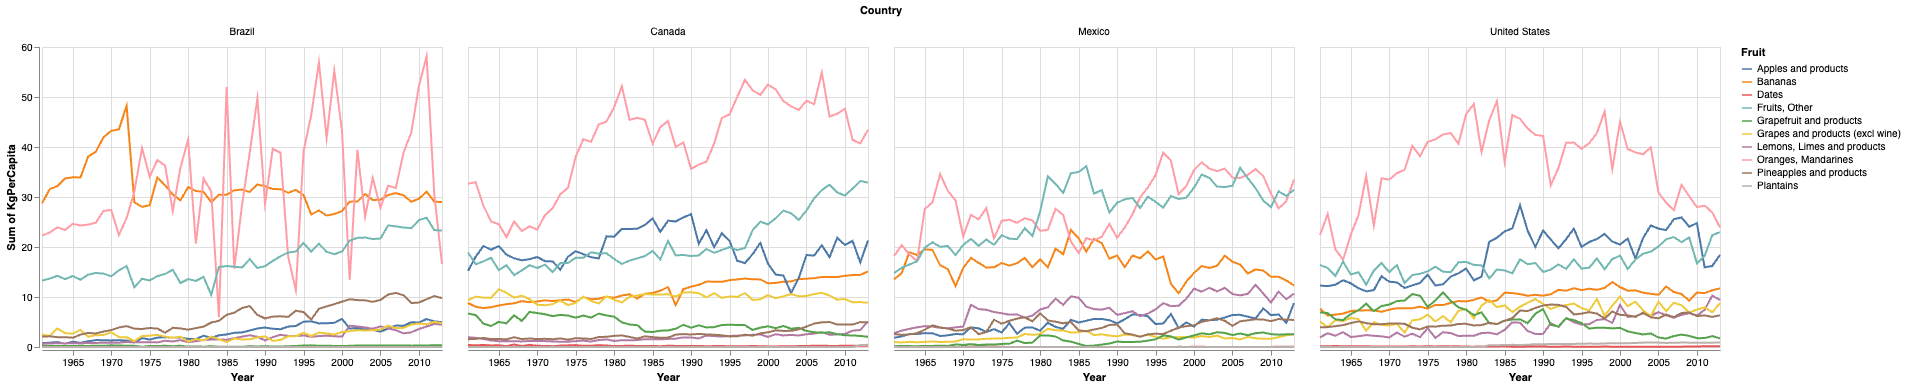

In [12]:
# 4. Create a faceted line plot, where the color represents the type of fruit and there is one facet for each country. What differences in the type of fruit produced can you see?
facets_countries_consumption = alt.Chart(fruits_americas).mark_line().encode(
    alt.X('Year'),
    alt.Y('sum(KgPerCapita):Q'),
    alt.Color('Fruit')
).facet("Country")


# Show the chart
facets_countries_consumption

In [13]:
grader.check("q2")

q2 results: All test cases passed!
q2 - 1 message: All your variables have the expected name and type

### Question 3

<div class="alert alert-info" style="color:black">

Next, let's look at how the same American countries compare in their vegetable consumption. We have given you the code to read in the dataframe and filter out the same countries as above to get started. Note that this data only contains the total of all vegetables consumed each year.

<ol type="1">
<li>Create a line plot that shows the amount of vegetables consumed in each country over time.</li>
<li>Create a scatter plot that compares the fruit and vegetable consumption for each country. Use the merged dataframe which we provide the code for below. Color the points by the country and put vegetables on the x-axis and fruits on the y-axis.</li>
<li>The scatter plot is useful for clearly separating the groups in the data, but it does not give us a sense for how the relationship between the fruit and vegetable consumption has evolved over time. Create a faceted line plot, where each country is in its own facet, the x-axis is time, and there are two lines per plot: one for fruits and one for vegetables.</li>
</ol>
</div>

_Points:_ 10

In [14]:
# Provded code to read in and filter the data
url = 'https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/vegetable-consumption-per-capita.csv'
veggies = pd.read_csv(
    url,
    parse_dates=['Year']
).rename(
    columns=lambda x: x.split(' - ')[0] if '-' in x else x
).rename(
    columns={'Entity': 'Country'}
)

veggies_americas = veggies.query('Country in ["Canada", "United States", "Mexico", "Brazil"]')
veggies_americas

,Country,Code,Year,Vegetables
1303,Brazil,BRA,1961-01-01,24.45
1304,Brazil,BRA,1962-01-01,25.25
1305,Brazil,BRA,1963-01-01,24.26
1306,Brazil,BRA,1964-01-01,24.80
1307,Brazil,BRA,1965-01-01,24.16
...,...,...,...,...
10408,United States,USA,2013-01-01,113.96
10409,United States,USA,2014-01-01,121.41
10410,United States,USA,2015-01-01,118.85
10411,United States,USA,2016-01-01,118.01


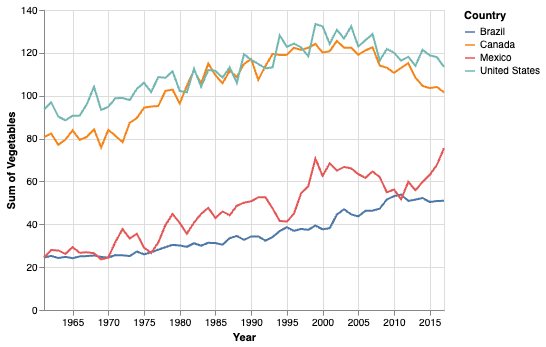

In [15]:
# 1.
lines_countries_consumption_veg = alt.Chart(veggies_americas).mark_line().encode(
    alt.X('Year:T'),
    alt.Y('sum(Vegetables):Q'),
    alt.Color('Country')
)

# Show the chart
lines_countries_consumption_veg

In [16]:
# Provided code to merge together the fruit and veggie data
veggies_and_fruits_americas = veggies_americas.merge(
    fruits_americas
        .groupby(['Country', 'Year'])
        ['KgPerCapita']
        .sum()
        .reset_index()
        .rename(columns={'KgPerCapita': 'Fruits'})
)
# Show the dataframe
veggies_and_fruits_americas

,Country,Code,Year,Vegetables,Fruits
0,Brazil,BRA,1961-01-01,24.45,70.53
1,Brazil,BRA,1962-01-01,25.25,74.20
2,Brazil,BRA,1963-01-01,24.26,77.99
3,Brazil,BRA,1964-01-01,24.80,76.98
4,Brazil,BRA,1965-01-01,24.16,79.39
...,...,...,...,...,...
207,United States,USA,2009-01-01,121.77,109.10
208,United States,USA,2010-01-01,120.08,103.08
209,United States,USA,2011-01-01,116.38,97.66
210,United States,USA,2012-01-01,118.16,103.27


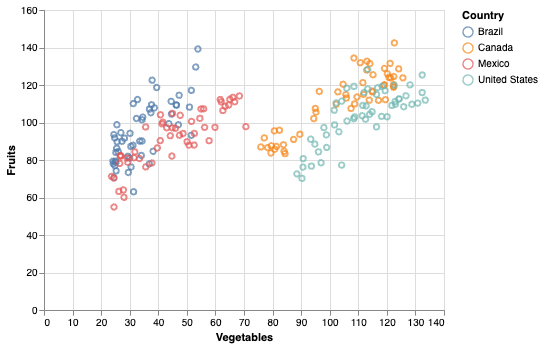

In [17]:
# 2.
scatter_fruits_and_veggies = alt.Chart(veggies_and_fruits_americas).mark_point().encode(
    alt.X('Vegetables:Q'),
    alt.Y('Fruits:Q'),
    alt.Color('Country')
)
# Show the chart
scatter_fruits_and_veggies

In [18]:
# Provided code to reshape the dataframe into tidy format
# and facilitate coloring by the type of commodity
veggies_and_fruits_americas_tidy = veggies_and_fruits_americas.melt(
    id_vars=['Country', 'Year', 'Code'],
    var_name='Commodity',
    value_name='KgPerCapita'
)
# Show the dataframe
veggies_and_fruits_americas_tidy

,Country,Year,Code,Commodity,KgPerCapita
0,Brazil,1961-01-01,BRA,Vegetables,24.45
1,Brazil,1962-01-01,BRA,Vegetables,25.25
2,Brazil,1963-01-01,BRA,Vegetables,24.26
3,Brazil,1964-01-01,BRA,Vegetables,24.80
4,Brazil,1965-01-01,BRA,Vegetables,24.16
...,...,...,...,...,...
419,United States,2009-01-01,USA,Fruits,109.10
420,United States,2010-01-01,USA,Fruits,103.08
421,United States,2011-01-01,USA,Fruits,97.66
422,United States,2012-01-01,USA,Fruits,103.27


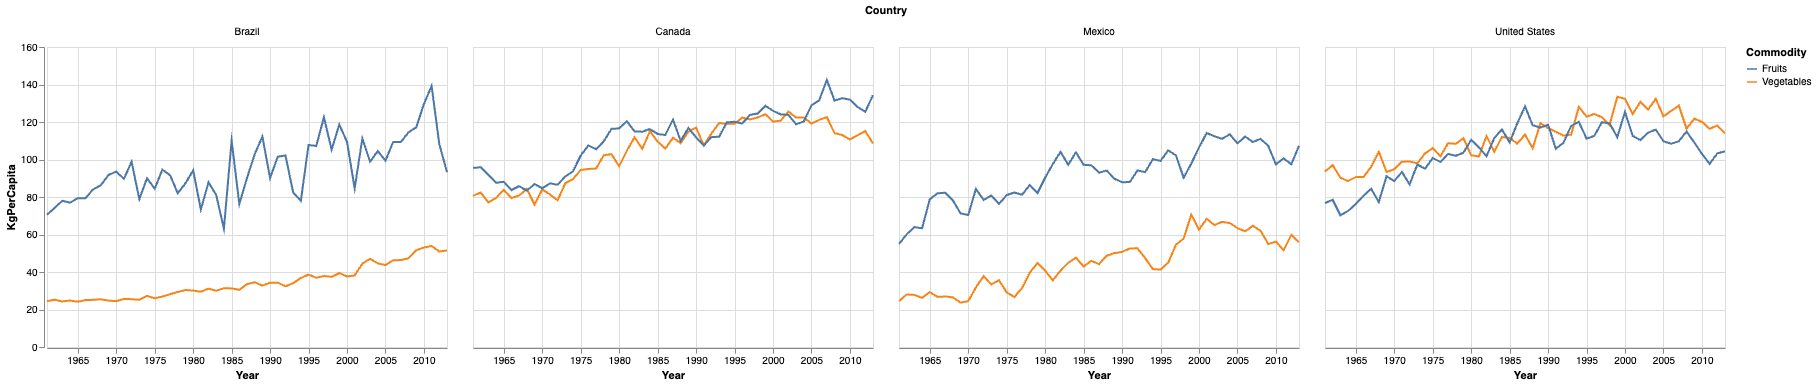

In [19]:
# 3.
facets_fruits_and_veggies = alt.Chart(veggies_and_fruits_americas_tidy).mark_line().encode(
    alt.X('Year'),
    alt.Y('KgPerCapita:Q'),
    alt.Color('Commodity')
).facet("Country")
# Show the chart
facets_fruits_and_veggies

In [20]:
grader.check("q3")

q3 results: All test cases passed!
q3 - 1 message: All your variables have the expected name and type

### Question 4

<div class="alert alert-info" style="color:black">

We have barely scratched the surface on these datasets. Take a minute to reflect on the vizzes you have created.
What have your learned about fruit and vegetable consumption across the Americas
What questions do you still have?
</div>

_Points:_ 4

#### Response to Q4.



**What I learned:**

According to the data in four countries, the consumption of fruits is larger than the consumption of vegetables in most countries, especially in Brazil and Mexico. However, The U.S. seems to consume more vegetables. 

For both vegetables and fruits, the overall consumption trend is increasing. The changes of the vegetables consumption are more stable than the changes of the fruits consumption during the time.

There is no correlation between the two. In years when vegetable consumption rises, the change in fruit may be up or down.

**What questions:**

Which country in Americas consumes the most fruits? Which country in Americas consumes the most vegetables?

Which country has the biggest change in fruits consumption since 1961? Which country has the biggest change in vegetables consumption since 1961?

<div class="alert alert-danger" style="color:black">
    
**Restart and run all cells before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for this course,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
</div>